### quest
- 분석 스토리 작성(목표변수:생존여부)
- dataset : TitanicFromDisaster_train.csv
- DDA, EDA 진행
- 설명변수는 연속형, 범주형 섞어 7개 이상

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')

df_TT = pd.read_csv('../../datasets/TitanicFromDisaster_train.csv')
df_TT

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [83]:
df_TT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
# 열 단위 추출 
df_TT_T = df_TT[['Pclass','Sex','SibSp','Parch', 'Fare', 'Cabin','Embarked','Survived']]
df_TT_T.head(3)

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,1,0,7.2500,NaN,S,0
1,1,female,1,0,71.2833,C85,C,1
2,3,female,0,0,7.9250,NaN,S,1


In [85]:
df_TT_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Cabin     204 non-null    object 
 6   Embarked  889 non-null    object 
 7   Survived  891 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


<Axes: xlabel='Fare'>

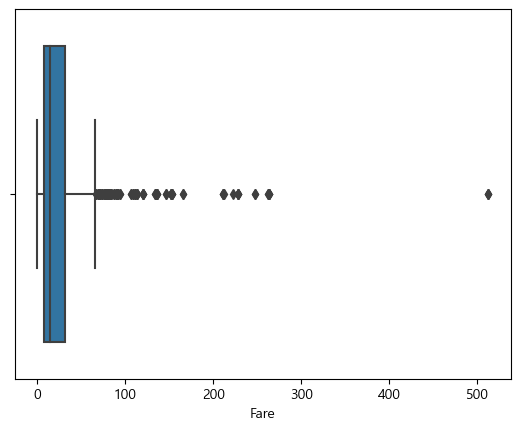

In [103]:
sns.boxplot(df_TT_T, x='Fare')

In [95]:
## 전처리: 대상 컬럼 의한 레코드 삭제시 dataset 양 고려
df_TT_T_dropna = df_TT_T.dropna()
df_TT_T_dropna.isnull().sum() # 결측치 확인

Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
Survived    0
dtype: int64

In [96]:
# 이상치 제거 
# Q1 , Q3 구하기 
Q1 = df_TT_T_dropna['Fare'].describe()['25%']
Q3 = df_TT_T_dropna['Fare'].describe()['75%']
IQR = Q3 -Q1

In [97]:
Q1, Q3, IQR

(28.959374999999998, 89.77605, 60.816675000000004)

In [98]:
bound_up = Q3 + 1.5 * IQR
bound_low = Q1 - 1.5 * IQR
bound_low, bound_up

(-62.26563750000001, 181.0010625)

In [99]:
#filler
condition = (df_TT_T_dropna['Fare'] < bound_up ) & (df_TT_T_dropna['Fare'] > bound_low ) # 긍정 조건 변환
condition

1      True
3      True
6      True
10     True
11     True
       ... 
871    True
872    True
879    True
887    True
889    True
Name: Fare, Length: 202, dtype: bool

In [100]:
df_TT_T_dropna_condition = df_TT_T_dropna[condition]

<Axes: xlabel='Fare'>

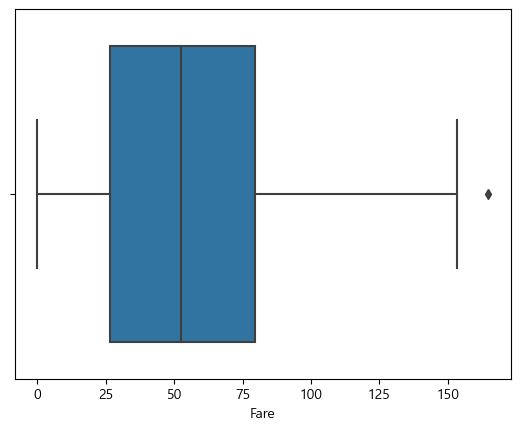

In [104]:
sns.boxplot(df_TT_T_dropna_condition, x='Fare')

### 상관관계 확인
- 목표변수 : 'Survived' 승객생존여부 
- 설명변수 :
  - 'Pclass' 승객의 객실 등급: 2등급의 생존이 상대적으로 높음
  - 'Sex' 성별: female가 Survived 높은 것 같다. 
  - 'SibSp' 함께 탑승한 형제자매 또는 배우자의 수: 0명 보다 1-2명일 때 생존이 상대적으로 높음
  - 'Parch' 함께 탑승한 부모나 자녀의 수: Parch가 많을수록 생존이 상대적으로 높음 
  - 'Fare' 지불한 요금: fare 차이 따라 분포 변화 영향을 줌
  - 'Cabin' 객실 번호: 차이에 여부 확인 필요(확증 데이터 분석),  
  - 'Embarked' 탑승한 항구를 나타내는 열 :  C항구 생존이 상대적으로 높음

- 분석 스토리 : 분석 결과를 종합하여 설명 변수들과 목표 변수인 'Survived' 간의 상관관계를 해석할 수 있다.
2등급 승객, 여성 승객, 형제자매 또는 배우자가 있는 승객, 가족 구성원이 많은 승객, 높은 요금을 지불한 승객, C항구에서 탑승한 승객이 생존 여부에 높은 영향을 미치는 것을 확인할 수 있다. 

<Axes: xlabel='Survived', ylabel='count'>

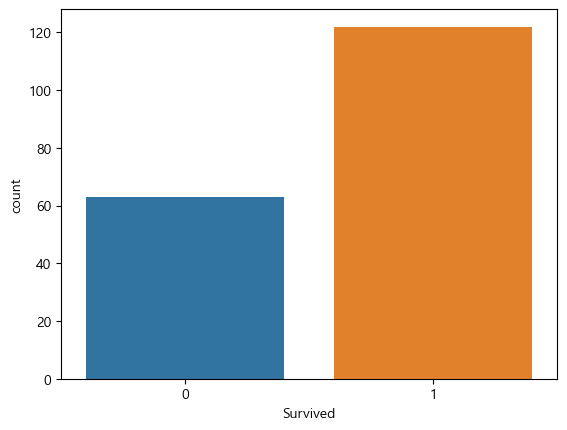

In [75]:
### 데이터 타입과 분포
## 목표 변수 : 
sns.countplot(data=df_TT_T_dropna_condition, x='Survived')

In [77]:
# object 변환 대상 : 범주형으로 볼 수 있는 것 
df_TT_T_dropna_condition[['Pclass','SibSp','Parch','Survived']] = df_TT_T_dropna_condition[['Pclass','SibSp','Parch','Survived']].astype(object)
df_TT_T_dropna_condition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 1 to 889
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    185 non-null    object 
 1   Sex       185 non-null    object 
 2   SibSp     185 non-null    object 
 3   Parch     185 non-null    object 
 4   Fare      185 non-null    float64
 5   Cabin     185 non-null    object 
 6   Embarked  185 non-null    object 
 7   Survived  185 non-null    object 
dtypes: float64(1), object(7)
memory usage: 13.0+ KB


C:\Users\04-02\AppData\Local\Temp\ipykernel_12596\1925111353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TT_T_dropna_condition[['Pclass','SibSp','Parch','Survived']] = df_TT_T_dropna_condition[['Pclass','SibSp','Parch','Survived']].astype(object)


In [78]:
df_TT_T_dropna_condition_list = df_TT_T_dropna_condition.describe().columns.to_list()# 연속형
df_TT_T_dropna_condition_list

['Fare']

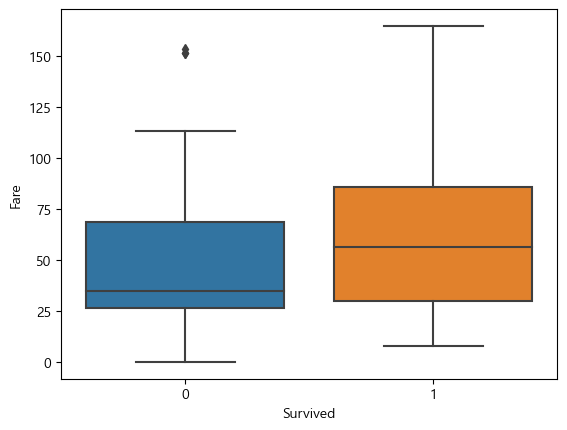

In [79]:
## x:연속형 / y: 범주형
for item in df_TT_T_dropna_condition_list :
    sns.boxplot(data=df_TT_T_dropna_condition, x='Survived', y=item)
    plt.show()

In [80]:
df_TT_T_dropna_condition_object_list = df_TT_T_dropna_condition.describe(include=object).drop(columns=['Survived']).columns.to_list()
df_TT_T_dropna_condition_object_list

['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked']

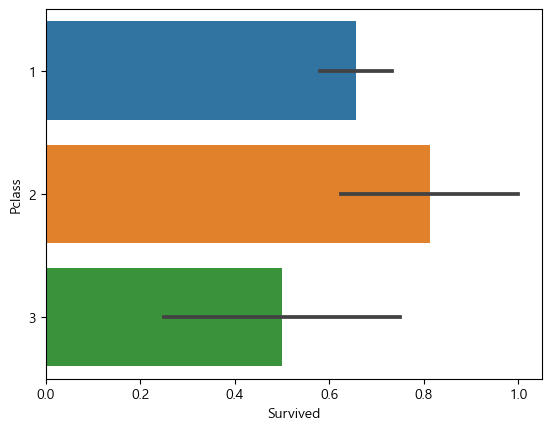

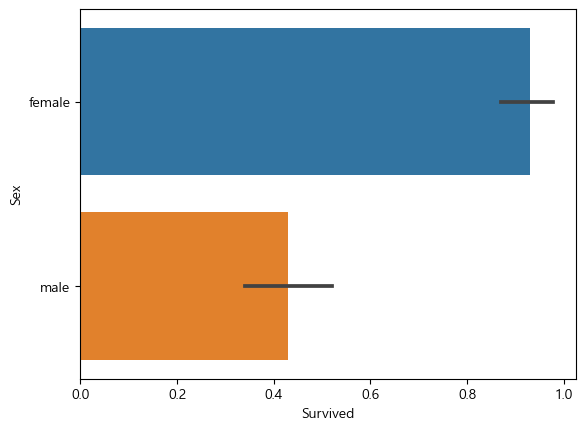

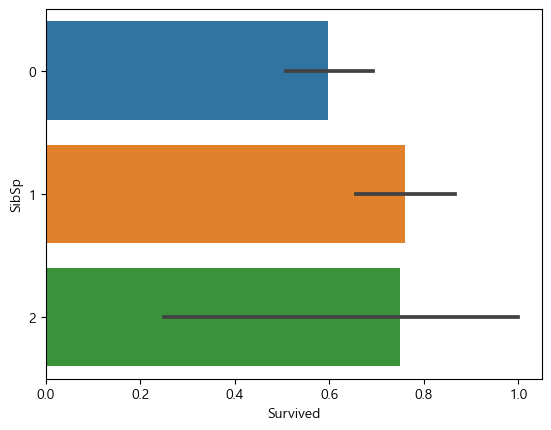

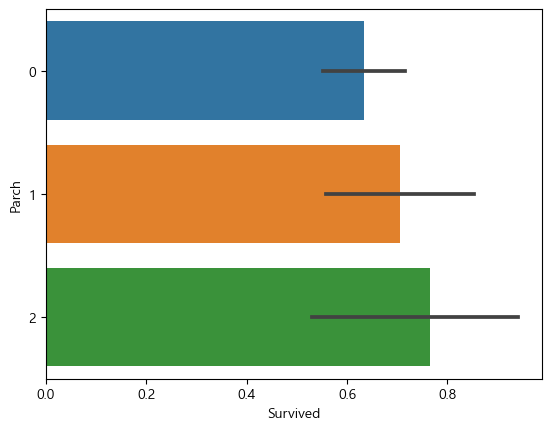

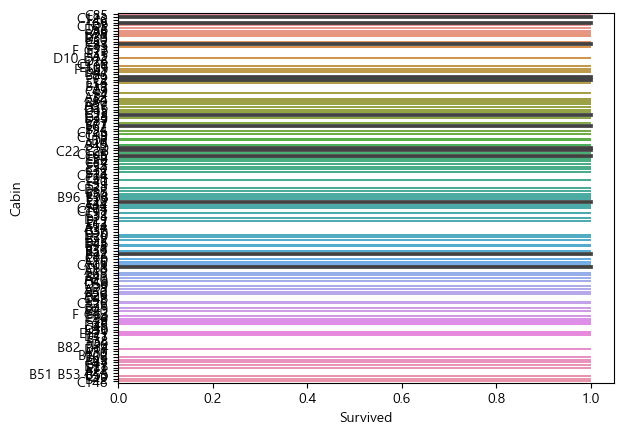

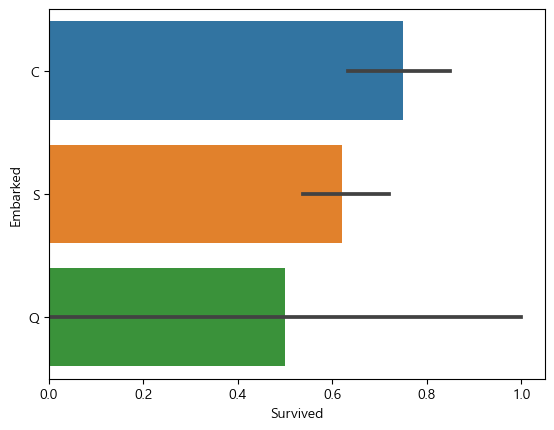

In [106]:
for item in df_TT_T_dropna_condition_object_list :
    sns.barplot(data=df_TT_T_dropna_condition, x='Survived', y=item , orient='h')
    plt.show()